In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date =  session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


2016-08-23


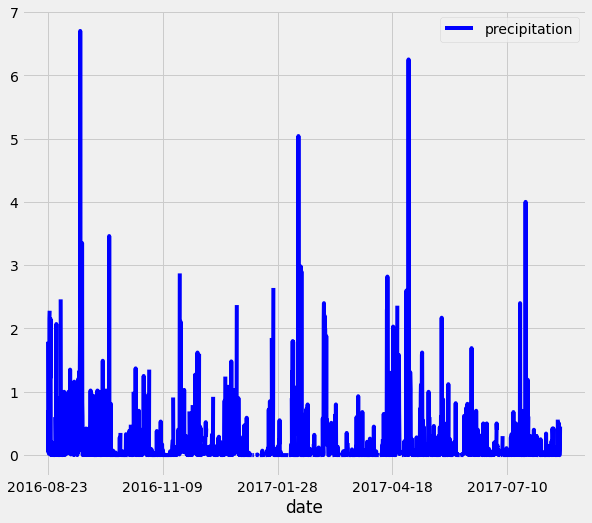

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(one_year_ago)

# # Perform a query to retrieve the data and precipitation scores

scores_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
scores_data

# # Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(scores_data, columns=['date', 'precipitation'])
scores_df.head()

# # Sort the dataframe by date
scores_df.set_index('date', inplace = True)
scores_df = scores_df.sort_index()
scores_df.head()

# # Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(color = "blue", figsize=(9, 8))
plt.title = ("Last 12 Months of Precipitation")
plt.ylabel = ("Inches")
plt.xlabel = ("Date")
plt.savefig("Last 12 Months of Precipitation.png")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(Station).count()
stations_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (
        session.query(Measurement.station, func.count(Measurement.station)).
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()))

active_stations.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#func.min
session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0)]

In [15]:
#func.max
session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(85.0)]

In [16]:
#func.avg
session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(71.66378066378067)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#create variable observations
observations = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter((Measurement.date >= one_year_ago)).all()

observations 

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [18]:
#creating dataframe
observations_df = pd.DataFrame(observations, columns = ['tobs'])
observations_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


TypeError: 'str' object is not callable

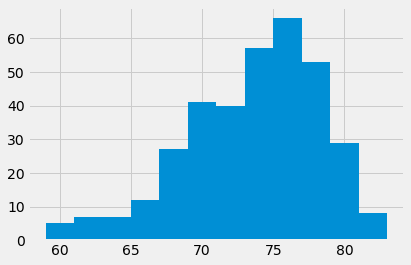

In [23]:
#histogram
plt.hist(observations_df, bins=12, rwidth=1.0, label = 'tobs')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend()
plt.savefig("output/frequency.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()